# Gradient Boosting: Classifying Player Positions

## What is Gradient Boosting?
Gradient Boosting is an ensemble learning algorithm that:
1. Combines multiple weak learners into a strong classifier
2. Uses gradient descent to minimize loss function
3. Builds classifiers sequentially, each trying to correct errors from previous ones

## Our Task
We'll use Gradient Boosting to classify EA FC 24 players as either offensive or defensive based on their attributes. This should improve upon our basic decision tree classifier.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Set the Seaborn theme
sns.set_theme()

## Data Preparation
We'll use the same features as our decision tree classifier:
- Shooting, Pace, Dribbling (offensive indicators)
- Defending, Physical (defensive indicators)

Gradient Boosting should be particularly effective at identifying players with mixed attributes by focusing on reducing the loss function.

In [2]:
players_df = pd.read_csv("../data/players_data.csv")

# Define offensive and defensive positions
offensive_positions = ['ST', 'CF', 'LW', 'RW', 'CAM']
defensive_positions = ['CB', 'LB', 'RB', 'CDM', 'LWB', 'RWB']

# Create target variable (1 for offensive, 0 for defensive)
def get_position_class(position_str):
    positions = str(position_str).split(', ')
    if any(pos in offensive_positions for pos in positions):
        return 1
    elif any(pos in defensive_positions for pos in positions):
        return 0
    return None

# Prepare the data
players_df['position_class'] = players_df['player_positions'].apply(get_position_class)

# Filter only offensive and defensive players
filtered_df = players_df[players_df['position_class'].notna()]

features = ["shooting", "defending", "pace", "dribbling", "physic"]
X = filtered_df[features].values
y = filtered_df['position_class'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

/var/folders/pz/s1ggtx853xx_qxny9g89ffgm0000gn/T/ipykernel_43077/3952018943.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  players_df = pd.read_csv("../data/players_data.csv")


## Model Training

In [3]:
# Create and train Gradient Boosting classifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_clf.fit(X_train, y_train)

# Make predictions
gb_y_pred = gb_clf.predict(X_test)

## Model Evaluation

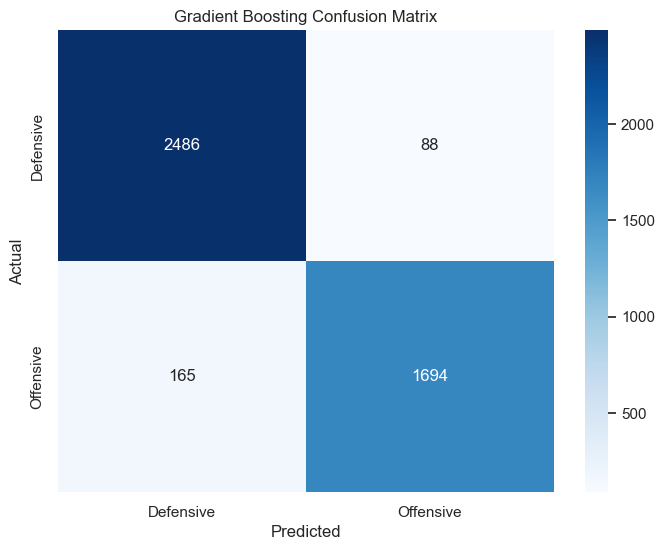


Classification Report:
              precision    recall  f1-score   support

   Defensive       0.94      0.97      0.95      2574
   Offensive       0.95      0.91      0.93      1859

    accuracy                           0.94      4433
   macro avg       0.94      0.94      0.94      4433
weighted avg       0.94      0.94      0.94      4433



In [4]:
from sklearn.metrics import confusion_matrix, classification_report

# Create confusion matrix
cm = confusion_matrix(y_test, gb_y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Defensive', 'Offensive'],
            yticklabels=['Defensive', 'Offensive'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, gb_y_pred, target_names=['Defensive', 'Offensive']))

## Feature Importance Analysis

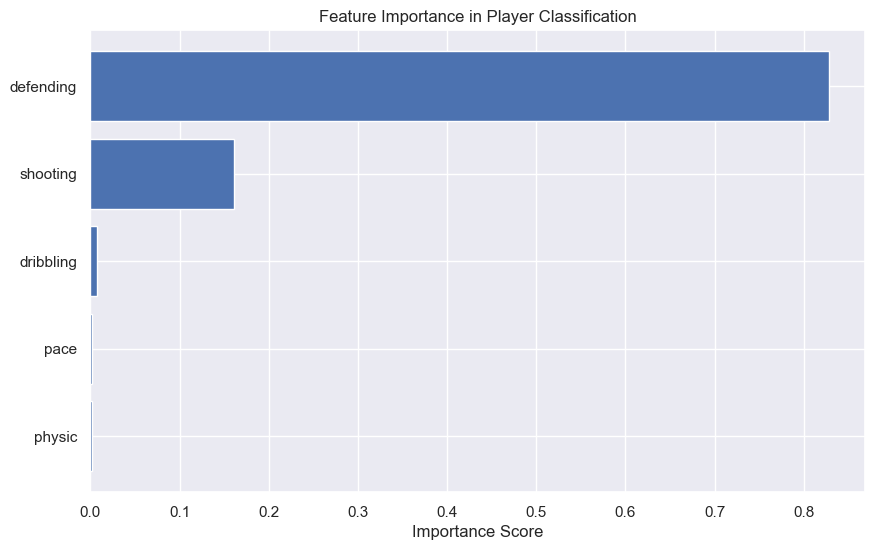

In [5]:
# Feature importance plot
plt.figure(figsize=(10, 6))
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': gb_clf.feature_importances_
})
feature_importance = feature_importance.sort_values('Importance', ascending=True)

plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.title('Feature Importance in Player Classification')
plt.xlabel('Importance Score')
plt.show()

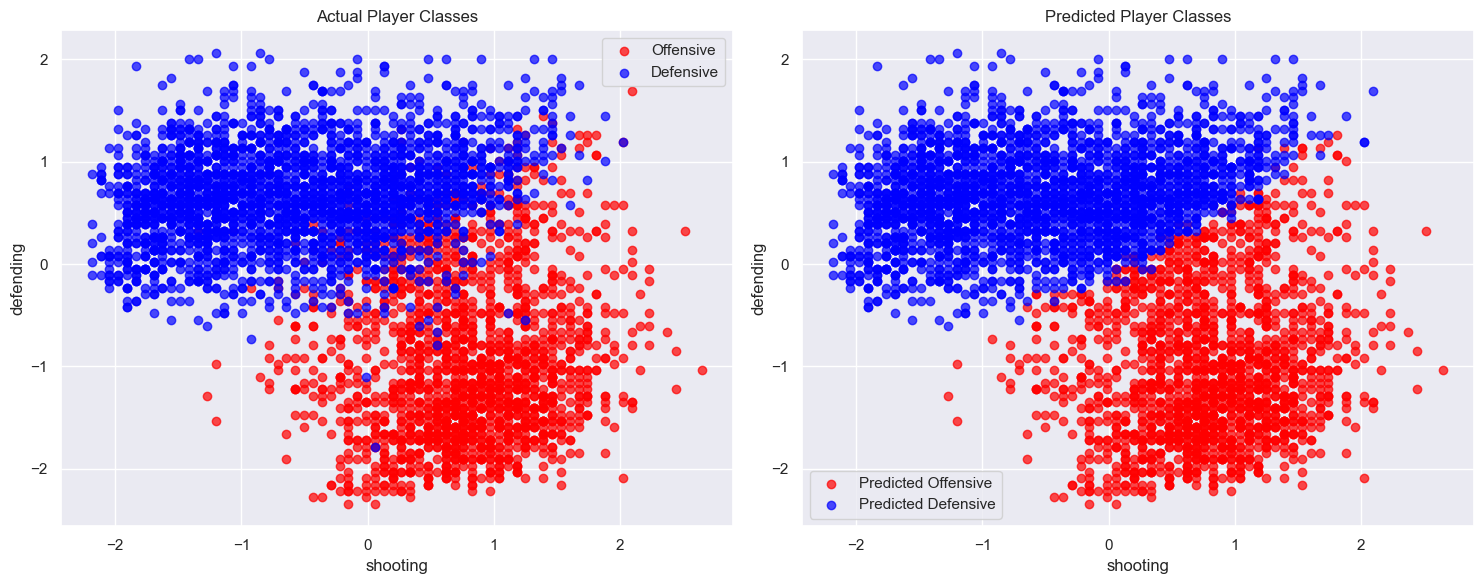

In [7]:
y_pred = gb_y_pred
# Create two subplots side by side
plt.figure(figsize=(15, 6))

# First subplot - Actual classes
plt.subplot(1, 2, 1)
top_features = feature_importance.tail(2)['Feature'].values

# Plot actual offensive players (y_test == 1) in red
plt.scatter(X_test[y_test == 1, 0], 
           X_test[y_test == 1, 1],
           label='Offensive', alpha=0.7, color='red')

# Plot actual defensive players (y_test == -1) in blue
plt.scatter(X_test[y_test == 0, 0], 
           X_test[y_test == 0, 1],
           label='Defensive', alpha=0.7, color='blue')

plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Actual Player Classes')
plt.legend()

# Second subplot - Predicted classes
plt.subplot(1, 2, 2)

# Plot predicted offensive players (y_pred == 1) in red
plt.scatter(X_test[y_pred == 1, 0], 
           X_test[y_pred == 1, 1],
           label='Predicted Offensive', alpha=0.7, color='red')

# Plot predicted defensive players (y_pred == -1) in blue
plt.scatter(X_test[y_pred == 0, 0], 
           X_test[y_pred == 0, 1],
           label='Predicted Defensive', alpha=0.7, color='blue')

plt.xlabel(top_features[0])
plt.ylabel(top_features[1])
plt.title('Predicted Player Classes')
plt.legend()

plt.tight_layout()
plt.show()